### 지난 시간 복습

In [ ]:
토큰화(Text -> Encoding;features)
문장(sent_tokenize), 토큰(word/Tweet/RegExp/TreeBank _tokenize)
형태소(pos_tag;penntreebank/stanford...)
연어(collocation), 공기어(co-ocurrence) => N-gram, chi-square, pmi, jacarrd..
; 낱개로 X,       항상 O,          의미적 연관
=> L.A, H.P...  Mr, Miss ...    민주, 주의, ... 대통령, 영부인, ...
+ed, ing, ... Stemming, be => Lemmatization
빈도 >>>>>>>>>>>>>>>>>>>>>> 고유한(유니크한) 전체 수 => Feature Extraction
Zipf law => 빈도의 역순 = 순위 역순, => 고빈도, 저빈도 중요도 X, 나머지 O
=> Feature Selection
한글에 적용, Heaps, 신조어, 어미, Entropy(-plogp), Perplexity(응집력)
N-Gram(LM, Tokenizing), Edit Distance(오탈자)

In [ ]:
토큰화 -> 왜 필요? 텍스트라고 하는 것들을 컴퓨터가 이해할 수 있는 형태로 인코딩 해야 하는데 그 대상을 누구로 만들거냐에 대한 문제
머신러닝 관점에서 피쳐(컬럼)를 어떻게 만들것이냐 하는 문제

그 동안의 우리가 다룬 데이터는 이미 잘 정리된 tidy 데이터들이었음.
그런데 텍스트는 그렇지 않음. 
토큰화의 대상이 되는 문서인 corpus를 기계가 이해할 수 있는 정도로 작은 단위로 쪼개야 함
문장(sent_tokenize) -> 토큰(word_tokenize, Tweettokenize, RegExptokenize, TreeBank); 각각의 토크나이저 별로 개수가 다 달랐음
즉, 인코딩 되는 개수가 각각이라는 것
이후 형태소를 찾아내기 위해 pos_tag 사용 -> 이것은 penntreebank(펜실베니아 대학 품사표, stanford...)

연어(collocation), 공기어(co-ocurrence) 이런 것들을 처리하기 위한 방법 중 하나로 N-gram, chi-square, pmi, jacarrd
-> 형태소는 문법상 의미를 갖는 가장 작은단위이다 보니, 우리말 같은 경우 온갖 조사가 포함됨. 그것들이 개별 낱개의 토큰으로 활용될 가치가 있는지
생각해보면, 훨씬 가치있는 단어들을 뽑을 수 있음. 자주 같이 나오는 형태의 것들
-> 낱개로 따로 떨여뜨렸을 때 의미가 안되거나, 항상 같이 나오는 패턴이거나, 의미적으로 연관이 되어 있거나.
-> 고유명사, L.A 등등(따로 떨어뜨려놓고 생각하면 안되는 애들) 미스터, 미세스...,    민주, 주의, ...(개별 의미도 가지지만 자주 같이 나오는)

이것만으로도 충분하지 않았음.
용언의 활용부분 +ed, -ing, ... 이런 애들 때문에 위에서 쪼개도 불구하고 토큰의 수가 많이 중복되고 늘어났었음.
이런 것들을 쪼개려고 Stemming, Lemmatizaion(be 동사) 을 했었음. 

이후 빈도를 봤을 때 순차적으로 보면 유니크한 단어의 전체 수의 빈도가 확 줄었음을 확인. 그러면 인코딩하는 차원, 피쳐의 수가 줄었다는 것.
그렇다면 동일한 데이터를 가지고 모델링하기 위해서 필요한 애들을 찾을 때 좀 더 중복과 의존성을 제외하고 추출할 수 있었음.

이런 과정을 일반적인 머신러닝에서는 Feature Extraction

이 중에서 또 좋은 피쳐를 걸러내기 위해서 경험적 법칙인 지프의 법칙을 봄; 빈도의 역순 = 순위의 역순
토크나이징을 좀 더 하면 할 수록 빈도의 역순이 순위의 역순과 가까워짐을 봄. 이것이 나타내는 의미는, 왼쪽의 고빈도와 오른쪽의 저빈도에 위치한
단어들은 중요도 측면에서 중요하지 않고 나머지 애들이 더 중요하더라 라는 것을 깨달음. 핵심적 의미를 가짐
그래서 우리 임의로 threshold 정해서 앞뒤를 자른 후 feature 들을 선택함.

오늘 할 것은 이것을 한글에 적용하는 것.
한글도 마찬가지로 토큰화 했을 떄 개수가 달라질 것. 의미있는 애들 없는 애들을 걸러낼 것.
거기에 힙스의 법칙도 볼 것. 이만으로 충분하지 않아서 단어의 생성 규칙(좌에서 우)을 이용해서 형태소들을 잘라볼 수 있음.
그것은 우리 말처럼 어순이 자유롭고 어미의 변화가 다양한 경우 많은 문제가 발생함; 표어 문자이기 때문에 소리나는대로 표기 가능해서.
신조어에 어미가 붙어버리면 기존의 분석방법으로 분석이 잘 안됨. 이럴 때 사용할 수 있는 토크나이징 사용해볼 것; Entropy(-plogp)

엔트로피는 딥러닝에 가서도 손실함수를 만들어내는 부분에 다 쓰일 것. 이후 Perplexity(응집력과 관련된 수치)를 볼 것
그리고 N-Gram 이용법 구체적으로 할 것. Edit Distance 도 볼 것(구어체 오타, 오탈자 등 걸러낼 때 쓸 것)

N-Gram 의 경우 자체가 언어모델(LM)이 될 수도 있고, Tokenizing하는 기법이 될수도 있음

In [1]:
!export MACOSX_DEPLOYMENT_TARGET=10.10

In [2]:
!pip install konlpy

In [3]:
from konlpy.tag import Okt

In [4]:
Okt().pos('아버지가 방에 들어가신다.')

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [5]:
Okt().pos('나는 수업에 왔다.')

[('나', 'Noun'),
 ('는', 'Josa'),
 ('수업', 'Noun'),
 ('에', 'Josa'),
 ('왔다', 'Verb'),
 ('.', 'Punctuation')]

In [6]:
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
Kkma().pos('어쩌고')
# Twitter X, Mecab(은전한닢) 별도설치
# REST API, Khaiii(CNN), Kiwi(LM), soynlp(통계)
# Token: SentencePieceModel(google), tensorflow, pytorch

[('어쩌', 'VV'), ('고', 'ECE')]

In [7]:
Komoran().pos('어쩌고')

[('어쩌', 'VV'), ('고', 'EC')]

In [8]:
Hannanum().pos('어쩌고')

[('어쩌고', 'M')]

In [9]:
Okt().pos('어쩌고')

[('어쩌', 'Noun'), ('고', 'Josa')]

In [10]:
Okt().pos('패키지가 너무 안깔려서 죽을 뻔 했다.')

[('패키지', 'Noun'),
 ('가', 'Josa'),
 ('너무', 'Adverb'),
 ('안', 'VerbPrefix'),
 ('깔려서', 'Verb'),
 ('죽', 'Noun'),
 ('을', 'Josa'),
 ('뻔', 'Noun'),
 ('했다', 'Verb'),
 ('.', 'Punctuation')]

### 수업

In [11]:
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
# Twitter => Okt 로 바뀜.
# Mecab => 별도 설치 해야 함. 빠르고 성능 좋음
from konlpy.corpus import kobill, kolaw

In [13]:
kobill.fileids(), kolaw.fileids()
#   법 의사록             헌법

(['1809896.txt',
  '1809897.txt',
  '1809895.txt',
  '1809894.txt',
  '1809890.txt',
  '1809891.txt',
  '1809893.txt',
  '1809892.txt',
  '1809899.txt',
  '1809898.txt'],
 ['constitution.txt'])

In [14]:
kolaw.open(kolaw.fileids()[0]).read()

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [15]:
data = list()
# 데이터에 담기
for f in kobill.fileids():
    data.append(kobill.open(f).read())
for f in kolaw.fileids():
    data.append(kolaw.open(f).read())

In [16]:
len(data)  # 10개가 의사록, 마지막 1개가 헌법

11

In [17]:
from nltk.text import Text
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize

In [18]:
len(data[-1].splitlines()), len(sent_tokenize(data[-1]))
# 개행                                마침표               -> 잘 맞아떨어지는 듯!

(356, 357)

In [20]:
len(data[-1].split()), len(word_tokenize(data[-1]))
# 단순 스플릿                    워드 토큰화            -> 개행이나 화이트스페이스는 아니지만 다른 구두점으로 단어 엮여있던 게 있을 것

(4178, 4640)

In [23]:
import re # 패턴 만들기.   [가-힣]; 전체 한글 음절
pat = re.compile('[가-힣]+')

len(regexp_tokenize(data[-1], pat))  # 여기서는 문장부호, 구두점이 다 빠졌을 것. 4640 - 4387 -> 300개 정도

4387

In [24]:
len(set(data[-1].splitlines())), len(set(sent_tokenize(data[-1])))

(345, 355)

In [25]:
len(set(data[-1].split())), len(set(word_tokenize(data[-1])))

(2029, 2023)

In [26]:
len(set(regexp_tokenize(data[-1], pat)))

1797

In [27]:
text1 = Text(word_tokenize(data[-1]))

In [28]:
text1.vocab().most_common(10)
# 헌법에 쓰였던 것들이라.

[('.', 357),
 (',', 101),
 ('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다', 57),
 ('한다', 56),
 ('정하는', 50)]

In [29]:
text2 = Text(regexp_tokenize(data[-1], pat))

In [31]:
list(zip(text1.vocab().most_common(10), text2.vocab().most_common(10)))

[(('.', 357), ('제', 175)),
 ((',', 101), ('조', 136)),
 (('수', 87), ('수', 87)),
 (('①', 75), ('또는', 70)),
 (('또는', 70), ('의하여', 66)),
 (('의하여', 66), ('법률이', 58)),
 (('법률이', 57), ('있다', 57)),
 (('있다', 57), ('한다', 56)),
 (('한다', 56), ('정하는', 50)),
 (('정하는', 50), ('그', 44))]

In [32]:
# 영어랑 다르게 법률이, 법률에서 가 다 다른 토큰으로 되어있을 것
'법률에서' in text2.vocab().keys()

True

In [33]:
'법률로' in text2.vocab().keys()

True

In [35]:
text2.vocab().get('법률에서'), text2.vocab().get('법률로'), text2.vocab().get('법률이')
# "법률"이 중심되는 단어. 문장에서 역할은 달라도.
# 따라서 다른 처리 없이 이상태로 보면 이런 것들은 알 수 없음. 이런 것들을 가지고 히트맵을 그리면 서로 연관성이 매우 높을 것.
# 그게 조사 떄문인지, 어근 때문인지는 더 봐야 함

(1, 30, 58)

In [36]:
text1.vocab().get(text1.vocab().max())
# 최대 빈도수로 나눠서 나눈 애가 랭크가 1 되도록

357

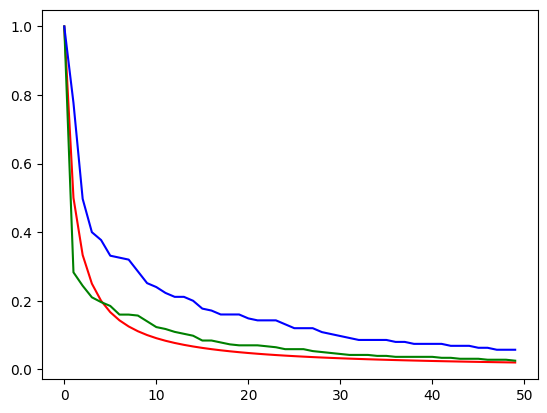

In [37]:
# 그림 그려보자
import matplotlib.pyplot as plt
N = 50
rank = [1/i for i in range(1, N+1)]  # 역순
text1_rank = list(map(lambda t:t[1]/text1.vocab().get(text1.vocab().max()), text1.vocab().most_common(N)))
text2_rank = list(map(lambda t:t[1]/text2.vocab().get(text2.vocab().max()), text2.vocab().most_common(N)))

plt.plot(rank, 'r-')
plt.plot(text1_rank, 'g-')  # 지금은 그냥 쪼갠 것이 더 가깝게 나옴.
plt.plot(text2_rank, '-b')

In [ ]:
# 한글로 쓰였든 영문으로 쓰였든 지프의 법칙을 어느정도 따라간다는 것을 확인 -> 언어에 상관없이 텍스트는 항상 이런 특징을 가진다!
# 텍스트 데이터가 밸런스가 안 맞춰지고 편향된 데이터라면 그래프가 깨질 것!

#### 형태소 분석기(KonlPy)

In [ ]:
# 실질적 자바로 돌아가는 KonlPy.
# 실제 리소스를 자바에서 씀. 이 환경에서는 자바가 더 중요

In [38]:
# 형태소 분석기 돌려보기
# Morphemem Analyzer -> Pos Tagger
# 형태소 분리/분석            품사태거
# (형태론, 형태학)           (통사론)
ma1 = Kkma()  # 서울대
ma2 = Komoran()
ma3 = Hannanum()
ma4 = Okt() # 트위터가 발전한 형태 -> Open Korean Tagger ; 한국어 분석 위해 만든 애들
# 누군가는 램이 딸리면 뻗을 것
# konlpy는 파이썬 껍데기에 자바 리소스

In [42]:
# pos_tag; penntree (품사표)
# 국립국어원 세종21(1차 사업, 2차 사업 -> 문어체, 구어체, 대화체 다 있음)
# ma1 Kkma 꼬꼬마가 제일 잘 따름.
# 제일 잘 축약해서 따르는 애들은 ma4 Okt
ma1.tagset
# 다 treebank 가 있는데 다 다름 => 즉 분석된 결과가 이 품사표(treebank)를 따르기 때문에 분석된 결과도 다 다름

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [ ]:
# ma1.morphs
# # 형태소 분석 결과
# ma1.nouns
# # 명사 추출 결과
# ma1.pos
# # 품사 부착된 결과

In [43]:
ma1.morphs('아버지가 방에 들어가신다.')

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다', '.']

In [ ]:
# 형태소 분석 들어가면서 Stemming(어간분리), Lemmatizaion(원형) 얘기를 안함.
# 형태소 분석에서 이 둘의 기능이 어느정도 들어가 있음. 그래서 따로 이야기를 안하는 것.
# 그럼에도 불구하고 형태소 분석기에 가면 원래 과정에 원형을 찾아가는 과정이 있음.
# 그래서 형태소 분석기 쓰면 따로 원형 안해도 됨
# 하지만 스테밍은 따로 할 것

In [44]:
s = '아버지가방에들어가신다'
ma1.pos(s), ma2.pos(s), ma3.pos(s), ma4.pos(s)
# 각 형태소 분석기의 분석 결과
# 참고로 Mecab 는 정확히 분석함. 이것은 원래 일본어 형태소 분석기. 일본말은 띄어쓰기가 없어서 잘 분석함
# 우리말은 띄어쓰기가 어절을 분리하는, 토큰을 찾아내는 강력한 구분점임을 알아야 함.

([('아버지', 'NNG'),
  ('가방', 'NNG'),
  ('에', 'JKM'),
  ('들어가', 'VV'),
  ('시', 'EPH'),
  ('ㄴ다', 'EFN')],
 [('아버지', 'NNG'),
  ('가방', 'NNP'),
  ('에', 'JKB'),
  ('들어가', 'VV'),
  ('시', 'EP'),
  ('ㄴ다', 'EC')],
 [('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')],
 [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')])

In [49]:
ma1.tagset['EPH']
# J 로 시작하는 애들이 조사
# E 가 어미

'존칭 선어말 어미'

In [50]:
ma2.tagset['JKB']

'부사격 조사'

In [52]:
ma3.tagset['J']
# 형태소 분석 할 떄 최장 일치를 하면, 형태소로 자를 수 있는 것들을 최대한 자르는데 신조어가 들어갔을 떄는 신조어를 한덩이로 보려고 하는데
# 그때 이 한나눔이 도움이 됨. => 즉 데이터에 따라 다르다는 것.

'관계언'

In [53]:
ma4.tagset['Josa']

'조사'

In [54]:
ma4.pos('들어가셨다. 들어가셨는데, 들어가시고, 들어간다. 들어갔다. 들다.')
# 다 다른 동사로 구분되지만, 의미는 다 같음을 우리는 알고 있음

[('들어가셨다', 'Verb'),
 ('.', 'Punctuation'),
 ('들어가셨는데', 'Verb'),
 (',', 'Punctuation'),
 ('들어가시고', 'Verb'),
 (',', 'Punctuation'),
 ('들어간다', 'Verb'),
 ('.', 'Punctuation'),
 ('들어갔다', 'Verb'),
 ('.', 'Punctuation'),
 ('들다', 'Verb'),
 ('.', 'Punctuation')]

In [55]:
ma2.pos('들어가셨다. 들어가셨는데, 들어가시고, 들어간다. 들어갔다. 들다.')
# 들어가 라는 원형에 어미가 붙어있는 형태로 분석이 됨. => 이런 식으로 분석하면 토큰화된 개수를 확 줄이고 원형의 의미를 살릴 수 있음
# 즉 의미를 전달하는 부분을 살릴 수 있다는 것.

[('들어가', 'VV'),
 ('시', 'EP'),
 ('었', 'EP'),
 ('다', 'EF'),
 ('.', 'SF'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('었', 'EP'),
 ('는데', 'EC'),
 (',', 'SP'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('고', 'EC'),
 (',', 'SP'),
 ('들어가', 'VV'),
 ('ㄴ다', 'EF'),
 ('.', 'SF'),
 ('들어가', 'VV'),
 ('았', 'EP'),
 ('다', 'EF'),
 ('.', 'SF'),
 ('들', 'VV'),
 ('다', 'EF'),
 ('.', 'SF')]

In [ ]:
# 우리말의 경우 라틴어를 기반으로 한 말과 마찬가지로 띄어쓰기가 엄청 강력한 제약조건이자 어절(단어)을 구분하는 단위.
# 중요하게 사용됨
# => 띄어쓰기를 보정하거나 띄어쓰기를 무시할 수 있는 Tokenizer 가 필요하다는 생각의 발전이 필요

In [ ]:
# 신조어 처리를 보자

In [56]:
s = '어쩔티비'  # 어떤 상황, 어떤 문맥 인지 봐야함
ma1.pos(s), ma2.pos(s), ma3.pos(s), ma4.pos(s)
# 1, 2 는 어쩌다 라는 동사로 분석함
# 3 은 최장일치법. 신조어 일 때 한나눔이 괜찮음. 문어체 표현의 완전히 딱딱한 분석은 기존의 세부적인 게 좋겠지만,
# 구어체나 일상체나 문법이 파괴된 형태에서는 다른 애들이 좋을 수 있음. 즉 강점이 다 있다는 것

([('어쩌', 'VV'), ('ㄹ', 'ETD'), ('티', 'NNG'), ('비', 'NNG')],
 [('어쩌', 'VV'), ('ㄹ', 'ETM'), ('티', 'NNG'), ('비', 'NNG')],
 [('어쩔티비', 'N')],
 [('어쩔', 'Modifier'), ('티비', 'Noun')])

In [57]:
s = '어쩔 티비'  # 띄어쓰기 들어가면 다르게 분석됨
ma1.pos(s), ma2.pos(s), ma3.pos(s), ma4.pos(s)
# 어디를 띄어쓰냐에 따라 분석되는 결과가 다름.

([('어쩌', 'VV'), ('ㄹ', 'ETD'), ('티비', 'NNG')],
 [('어쩌', 'VV'), ('ㄹ', 'ETM'), ('티', 'NNG'), ('비', 'NNG')],
 [('어쩌', 'P'), ('ㄹ', 'E'), ('티비', 'N')],
 [('어쩔', 'Adverb'), ('티비', 'Noun')])

In [58]:
s = '어 쩔티비'  # 띄어쓰기 들어가면 다르게 분석됨
ma1.pos(s), ma2.pos(s), ma3.pos(s), ma4.pos(s)
# 어디를 띄어쓰냐에 따라 분석되는 결과가 다름. 이래서 우리 말이 어려움.

([('어', 'VV'),
  ('어', 'ECS'),
  ('쩔', 'VV'),
  ('ㄹ', 'ETD'),
  ('티', 'NNG'),
  ('비', 'NNG')],
 [('어', 'IC'), ('쩌', 'EF'), ('ㄹ', 'ETM'), ('티', 'NNG'), ('비', 'NNG')],
 [('어', 'N'), ('쩔티비', 'N')],
 [('어', 'Eomi'), ('쩔', 'Noun'), ('티비', 'Noun')])

In [60]:
text_ma1 = Text('\t'.join([' '.join(ma1.morphs(s)) for s in sent_tokenize(data[-1])]).split())
text_ma2 = Text('\t'.join([' '.join(ma2.morphs(s)) for s in sent_tokenize(data[-1])]).split())
text_ma3 = Text('\t'.join([' '.join(ma3.morphs(s)) for s in sent_tokenize(data[-1])]).split())
text_ma4 = Text('\t'.join([' '.join(ma4.morphs(s)) for s in sent_tokenize(data[-1])]).split())

In [61]:
(text_ma1.vocab().N(), text_ma1.vocab().B()), \
(text_ma2.vocab().N(), text_ma2.vocab().B()), \
(text_ma3.vocab().N(), text_ma3.vocab().B()), \
(text_ma4.vocab().N(), text_ma4.vocab().B())

((10053, 1247), (9800, 1219), (8549, 1469), (8452, 1358))

In [64]:
list(zip(text_ma1.vocab().most_common(10), text_ma2.vocab().most_common(10),
        text_ma3.vocab().most_common(10), text_ma4.vocab().most_common(10)))
# 분석기마다 결과 다 다름

[(('의', 532), ('하', 472), ('하', 415), ('의', 380)),
 (('하', 457), ('의', 387), ('의', 396), ('.', 357)),
 (('.', 359), ('.', 360), ('.', 340), ('에', 282)),
 (('에', 328), ('에', 330), ('에', 283), ('을', 211)),
 (('는', 281), ('는', 287), ('이', 268), ('은', 179)),
 (('ㄴ다', 243), ('ㄴ다', 243), ('ㄴ다', 241), ('제', 178)),
 (('ㄴ', 234), ('ㄴ', 236), ('을', 232), ('이', 176)),
 (('을', 232), ('이', 230), ('ㄴ', 223), ('한다', 155)),
 (('은', 195), ('을', 225), ('는', 214), ('·', 145)),
 (('이', 192), ('은', 199), ('은', 198), ('를', 130))]

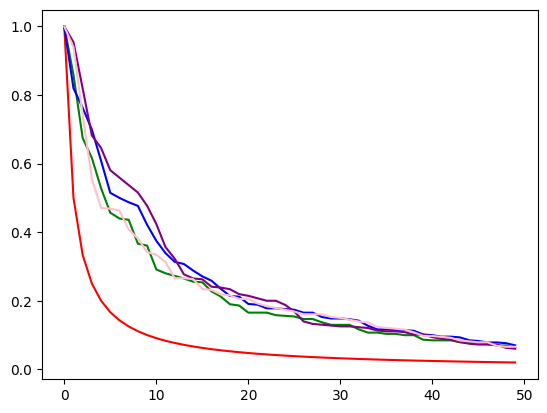

In [67]:
# 그림 그려보자
N = 50
rank = [1/i for i in range(1, N+1)]  # 역순
text1_rank = list(map(lambda t:t[1]/text_ma1.vocab().get(text_ma1.vocab().max()), text_ma1.vocab().most_common(N)))
text2_rank = list(map(lambda t:t[1]/text_ma2.vocab().get(text_ma2.vocab().max()), text_ma2.vocab().most_common(N)))
text3_rank = list(map(lambda t:t[1]/text_ma3.vocab().get(text_ma3.vocab().max()), text_ma3.vocab().most_common(N)))
text4_rank = list(map(lambda t:t[1]/text_ma4.vocab().get(text_ma4.vocab().max()), text_ma4.vocab().most_common(N)))

plt.plot(rank, 'r-')
plt.plot(text1_rank, 'g-')  # Kkma
plt.plot(text2_rank, '-b')
plt.plot(text3_rank, 'purple')
plt.plot(text4_rank, 'pink')

In [ ]:
# 위에서 N을 키우면 빨간 줄에 거의 근접함. 지프의 법칙이 통용됨을 확인
# 이제 앞뒤에 지워버리면 남는 애들이 중요한 애들임을 알 수 있음.

In [68]:
text_ma1.vocab().most_common(100)
# 실제 어미, 조사, 구두점 빼고 -> 가장 좋은 단어는 법률

[('의', 532),
 ('하', 457),
 ('.', 359),
 ('에', 328),
 ('는', 281),
 ('ㄴ다', 243),
 ('ㄴ', 234),
 ('을', 232),
 ('은', 195),
 ('이', 192),
 ('저', 155),
 ('여', 149),
 ('·', 145),
 ('ㄹ', 141),
 ('조', 136),
 ('를', 135),
 ('법률', 121),
 ('되', 113),
 (',', 101),
 ('있', 99),
 ('다', 88),
 ('정하', 88),
 ('수', 88),
 ('대통령', 84),
 ('의하', 83),
 ('과', 82),
 ('①', 78),
 ('②', 78),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('또는', 69),
 ('로', 62),
 ('으로', 57),
 ('지', 57),
 ('국회', 55),
 ('때', 55),
 ('아니하', 53),
 ('관하', 53),
 ('그', 46),
 ('며', 45),
 ('가', 45),
 ('③', 45),
 ('와', 42),
 ('회의', 42),
 ('받', 41),
 ('고', 39),
 ('모든', 37),
 ('바', 37),
 ('위하', 33),
 ('가지', 32),
 ('필요', 31),
 ('여야', 31),
 ('위원', 31),
 ('없', 30),
 ('국무', 30),
 ('1', 28),
 ('기타', 26),
 ('선거', 26),
 ('및', 25),
 ('3', 24),
 ('보장', 24),
 ('에서', 24),
 ('정부', 23),
 ('사항', 23),
 ('의원', 23),
 ('항', 22),
 ('자유', 21),
 ('권리', 21),
 ('국', 21),
 ('어야', 21),
 ('의무', 20),
 ('제', 20),
 ('④', 20),
 ('거나', 20),
 ('대하', 19),
 ('일', 19),
 ('2', 19),
 ('직무', 1

In [69]:
threshold = .3
cp = 0.0
mft = list()   # most frequent
for t in text_ma1.vocab().most_common(100):
    if cp > threshold:
        break
    cp += text_ma1.vocab().freq(t[0])  # freq 는 빈도가 아닌 비율
    mft.append(t)

In [70]:
len(mft)  # 단어로서 11번째부터 좋은 것이라는 것

10

In [71]:
text_ma1.vocab().most_common(100)[11:20]
# 조사들이 많이 날라감

[('여', 149),
 ('·', 145),
 ('ㄹ', 141),
 ('조', 136),
 ('를', 135),
 ('법률', 121),
 ('되', 113),
 (',', 101),
 ('있', 99)]

In [72]:
text_ma1.vocab().most_common(1000)[::-1]
# 1번 나와서 덜 중요한 애들 => 이것도 빼면 중간에 남는 애들이 중요한 표현들 위주로 남아있게 될 것.

[('74', 1),
 ('접수', 1),
 ('신임', 1),
 ('사절', 1),
 ('73', 1),
 ('72', 1),
 ('대행', 1),
 ('순서', 1),
 ('정한', 1),
 ('사고', 1),
 ('71', 1),
 ('ㅂ니다', 1),
 ('엄숙히', 1),
 ('성실히', 1),
 ('직책', 1),
 ('즈음', 1),
 ('취임', 1),
 ('69', 1),
 ('사망', 1),
 ('당선자', 1),
 ('내지', 1),
 ('68', 1),
 ('달하', 1),
 ('세', 1),
 ('현재', 1),
 ('선거일', 1),
 ('피', 1),
 ('총수', 1),
 ('득표수', 1),
 ('자로', 1),
 ('표', 1),
 ('다수', 1),
 ('수가', 1),
 ('과반', 1),
 ('득표자', 1),
 ('67', 1),
 ('수반', 1),
 ('행정권', 1),
 ('성실', 1),
 ('책무', 1),
 ('수호', 1),
 ('계속성', 1),
 ('대표', 1),
 ('원수', 1),
 ('66', 1),
 ('민', 1),
 ('그러', 1),
 ('그치', 1),
 ('파면', 1),
 ('공직', 1),
 ('정지', 1),
 ('결', 1),
 ('65', 1),
 ('제명', 1),
 ('64', 1),
 ('63', 1),
 ('하여금', 1),
 ('응답', 1),
 ('질문', 1),
 ('62', 1),
 ('증언', 1),
 ('증인', 1),
 ('서류', 1),
 ('사안', 1),
 ('특정', 1),
 ('61', 1),
 ('주류', 1),
 ('군대', 1),
 ('지우', 1),
 ('재정적', 1),
 ('제약', 1),
 ('항해', 1),
 ('통상', 1),
 ('우호', 1),
 ('원조', 1),
 ('세율', 1),
 ('종목', 1),
 ('조세', 1),
 ('59', 1),
 ('미리', 1),
 ('려', 1),
 ('예산외', 1),
 ('모집', 1)

In [ ]:
# Text 객체를 한글에서 좀 더 보자

In [73]:
text_ma1.collocation_list()
# Signature: text_ma1.collocation_list(num=20, window_size=2) ; num이 threshold
# 많이 붙어 나오는 애들

[('정치적', '중립성'), ('재판소', '재판관')]

In [75]:
text_ma1.collocations()

정치적 중립성; 재판소 재판관


In [76]:
text_ma1.concordance('중립성')

Displaying 3 of 3 matches:
성 하 ㄴ 의무 를 수행 하 ㅁ 을 사명 으로 하 며 , 그 정치적 중립성 은 준수 되 ㄴ다 . 저 의 6 조 ① 헌법 에 의하 여 체결 · 
민 에 대하 여 책임 을 질 ㄴ다 . ② 공무원 의 신분 과 정치적 중립성 은 법률 이 정하 는 바 에 의하 여 보장 되 ㄴ다 . 저 의 8 
 무상 으로 하 ㄴ다 . ④ 교육 의 자주성 · 전문 성 · 정치적 중립성 및 대학 의 자율성 은 법률 이 정하 는 바 에 의하 여 보장 되 


In [77]:
text_ma1.concordance('재판소')

Displaying 14 of 14 matches:
활동 이 민주적 기본 질서 에 위배 되 ㄹ 때 에 는 정부 는 헌법 재판소 에 그 해산 을 제소 하 ㄹ 수 있 고 , 정당 은 헌법 재판소 의
법 재판소 에 그 해산 을 제소 하 ㄹ 수 있 고 , 정당 은 헌법 재판소 의 심판 에 의하 여 해산 되 ㄴ다 . 저 의 9 조 국가 는 전통
① 대통령 · 국무총리 · 국무 위원 · 행정 각부 의 장 · 헌법 재판소 재판관 · 법관 · 중앙 선거 관리 위원회 위원 · 감사원장 · 감
되 는 여부 가 재판 의 전제 가 되 ㄴ 경우 에 는 법원 은 헌법 재판소 에 제청 하 여 그 심판 에 의하 여 재판 하 ㄴ다 . ② 명령 ·
고 하 ㄴ 경우 에 는 그러하 지 아니하 다 . 저 의 6 장 헌법 재판소 제 111 조 ① 헌법 재판소 는 다음 사항 을 관장 하 ㄴ다 . 
지 아니하 다 . 저 의 6 장 헌법 재판소 제 111 조 ① 헌법 재판소 는 다음 사항 을 관장 하 ㄴ다 . 1 . 법원 의 제청 에 의하 
심판 5 . 법률 이 정하 는 헌법 소원 에 관하 ㄴ 심판 ② 헌법 재판소 는 법관 의 자격 을 가지 ㄴ 9 인의 재판관 으로 구성 하 며 ,
3 인은 대법원장 이 지명 하 는 자 를 임명 하 ㄴ다 . ④ 헌법 재판소 의 장 은 국회 의 동의 를 얻 어 재판 관중 에서 대통령 이 임명
 관중 에서 대통령 이 임명 하 ㄴ다 . 저 의 112 조 ① 헌법 재판소 재판관 의 임기 는 6 년 으로 하 며 , 법률 이 정하 는 바 에
률 이 정하 는 바 에 의하 여 연임 하 ㄹ 수 있 다 . ② 헌법 재판소 재판관 은 정당 에 가입 하 거나 정치 에 관여 하 ㄹ 수 없 다 
정당 에 가입 하 거나 정치 에 관여 하 ㄹ 수 없 다 . ③ 헌법 재판소 재판관 은 탄핵 또는 금고 이상 의 형의 선고 에 의하 지 아니하 
니하 고는 파 면 되 지 아니하 ㄴ다 . 저 의 113 조 ① 헌법 재판소 에서 법률 의 위헌 결정 , 탄핵 의 결정 , 정당 해산 의 결정 
 는 재판관 6 인 

In [82]:
text_ma1.vocab().get('대통령'), text_ma1.vocab().get('중립성')

(84, 3)

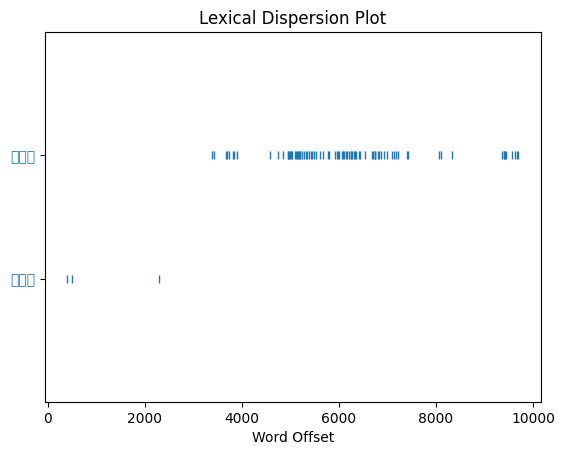

In [79]:
text_ma1.dispersion_plot(['대통령', '중립성'])

In [80]:
text_ma1.similar('대통령')
# 같은 문맥안에서 같이 나왔거나 근처에서 나왔거나(의미적 유사성이 아님)

법률 국회의원 공무원 국민 조약 법원 대한민국 헌법 저 국가 정책 효력 정당 발전 법관 재판 재산권 군인 교육 항


In [ ]:
# 이걸 통해서 볼 수 있는 것은
# 우리 글에서 상위의 가장 많은 빈도는 조사, 어미 -> 의미적으로 불필요. 그냥 쓰는 것은 의미가 없음
# 1음절 짜리는 제거하는 것도 좋은 방법임

#### 힙스의 법칙

In [ ]:
# 유니크한 단어의 수 관련 경험 법칙
# Heaps 의 법칙
# 사용자 평 하나하나가 문서. 뉴스 분석에서는 뉴스 단 건 하나하나가 문서가 될 것
# 문서가 늘어나면 늘어날수록 거기서 사용되는 단어들도 늘어남.
# 문서를 수집할 때마다 유니크한 단어가 기하급수적으로 증가할 것.
# 그걸 어떻게 감안할 것인지 내용이 힙스의 법칙
# 문서 안의 유니크한 단어(피쳐가 될 것들)들이 무한정 늘어나지 않는다는 것. 특정한 법칙을 띄고 있음. 로그함수
# 아무리 수집하고 분석해도 우리가 처리해야하는 유니크한 단어의 수는 어느정도 고정되어 있고 결정되어 있음을 나타내는 법칙
# 문서를 여러개 열어야 증명할 수 있음
# 이는 KoNLPY 로 한글을 이용해서 할 것.

In [84]:
data

['행정절차법 일부개정법률안\n\n(유선호의원 대표발의 )\n\n 의 안\n 번 호\n\n9896\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 유선호․강기갑․김효석  \n\n최문순ㆍ최재성ㆍ조영택  \n\n김성곤ㆍ문학진ㆍ백재현  \n\n송민순ㆍ양승조ㆍ신낙균  \n\n조배숙ㆍ박은수ㆍ정동영  \n\n김춘진ㆍ김재윤ㆍ우윤근  \n\n이성남ㆍ박영선 의원\n\n             (20인)\n\n제안이유\n\n  현행법은 입법예고와 행정예고를 통하여 정책 결정 과정에 국민 참\n\n여의 절차를 규정하고 있기는 하나 실제 정책 결정·집행·평가의 단계\n\n에서 근본적인 국민 참여 규정은 거의 없어 위임입법에 의하여 정책 \n\n결정 및 집행 권한이 부여되는 문제점이 있음.\n\n  따라서 입법예고 이전의 국민적 협의절차와 재입법예고 규정 등을 \n\n신설하고, 당사자 등의 개념을 명확히 하여 당사자의 신청에 의한 청\n\n문의 기회를 보장하는 한편, 법령상의 일부 미비점을 개선․보완함으\n\n- 1 -\n\n\x0c- 2 -\n\n로써 실질적인 국민 참여의 기회를 보장하여 행정에 대한 국민의 불\n\n신을 없애고 행정의 투명성을 확보하려는 것임.   \n\n주요내용\n\n  가. 법의 적용 제외 대상을 대통령령으로 정할 수 없게 하는 대신에 \n\n법에서 상세하게 규정하도록 함(안 제3조).\n\n  나. 당사자의 개념을 명확히 하고, 당사자의 신청에 의하여 청문을 \n\n실시할 수 있도록 함(안 제2조제4호, 제22조제1항제1호의2 신설). \n\n  다. 법제처장은 입법예고를 하지 아니한 법령안의 심사를 반려할 수 \n\n있도록 하고, 법령안 주관기관의 장은 입법예고 후 예고내용에 \n\n중요한 변경이 발생하거나 국민생활과 직접 관련되는 내용이 추\n\n가되는 경우에는 재입법예고를 하도록 함(안 제41조제4항 및 제5\n\n항 신설).\n\n  라. 입법예고기간과 행정예고기간을 50일 이상으로 연장함(안 제43\n\n조 및 제46조의2).\

In [149]:
len(data) # 10개가 의사록 마지막 1개가 헌법

11

In [121]:
heaps_1 = list()
for i, _ in enumerate(data):
    heaps_1.append(Text(word_tokenize('\n'.join(data[0:i+1]))))

In [154]:
heaps_1
# 누적; 문서가 늘어나면 늘어날수록 유니크한 단어가 증가함을 보기 위해서 문서를 누적시키는 것.

[<Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>,
 <Text: 행정절차법 일부개정법률안 ( 유선호의원 대표발의 ) 의 안...>]

In [112]:
heaps_1[0].vocab().N(), heaps_1[0].vocab().B()
#     total                      unique

(2443, 768)

In [161]:
len(heaps_1[1])

3351

In [165]:
heaps_1[0].vocab(),\
heaps_1[1].vocab(),\
heaps_1[0].vocab() + heaps_1[1].vocab()

(FreqDist({'.': 141, '--': 122, '(': 52, ')': 52, ',': 50, '-': 33, '한다': 32, '관한': 28, '사항': 27, '경우': 26, ...}),
 FreqDist({'.': 204, '--': 122, '-': 72, ',': 67, ')': 64, '(': 62, '관한': 35, '및': 34, '한다': 32, '사항': 27, ...}),
 FreqDist({'.': 345, '--': 244, ',': 117, ')': 116, '(': 114, '-': 105, '한다': 64, '관한': 63, '및': 58, '사항': 54, ...}))

In [166]:
heaps_1[4].vocab()
# 다 다른 애들. 다 누적되면서 들어가기 떄문

FreqDist({'.': 291, '--': 280, '-': 114, ')': 113, '(': 111, ',': 87, '및': 53, '관한': 43, ':': 40, '경우': 40, ...})

In [167]:
[h.vocab().N() for h in heaps_1]

[2443, 3351, 3857, 4133, 5257, 6373, 7462, 8860, 11392, 12338, 16978]

In [139]:
heaps_2 = list()
for i, _ in enumerate(data):
    heaps_2.append(Text(
        '\n'.join([' '.join(ma1.morphs(s))
                   for s in sent_tokenize('\n'.join(data[0:i+1]))]).split()
                       ))

# 메모리 충분하면 그냥 돌리면 됨(morphs 돌려서 Text 객체 만들면 됨)
# doc1, doc2, ...
# join(doc1, doc2) => text?
# sent_tokenize(text?) => s1, s2, ...
# ---> 일반적으로 여기서 터짐 그래서 온전하게 형태소 문장 가져오도록
# 형태소분석기(s1, s2, ...) => ['형태소', '형태소', ...] => join('형태소, 형태소, ...') 공백으로
# ['형태소, 형태소, ... ㅌ s1', '형태소, 형태소, ... ㅌ s2'] => join(\n)
# '형태소, 형태소, ... ㅌ s1\n형태소, 형태소, ... ㅌ s2\n...'
# split => ['형태소', '형태소', '형태소'] => Text 객체

In [168]:
[h.vocab().N() for h in heaps_2]

[4439, 5826, 6790, 7331, 9357, 11374, 13371, 15752, 20112, 21591, 31644]

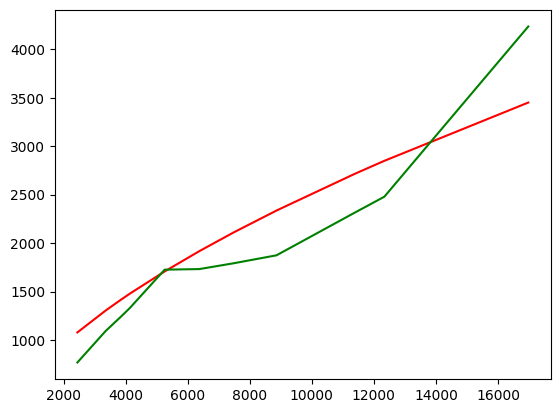

In [169]:
heaps = lambda N,k=10,b=.6 : k*(N**b)      # k=10~100, b=0.4~0.6
plt.plot([h.vocab().N() for h in heaps_1],
        [heaps(h.vocab().N()) for h in heaps_1], '-r')
plt.plot([h.vocab().N() for h in heaps_1],
        [h.vocab().B() for h in heaps_1], '-g')

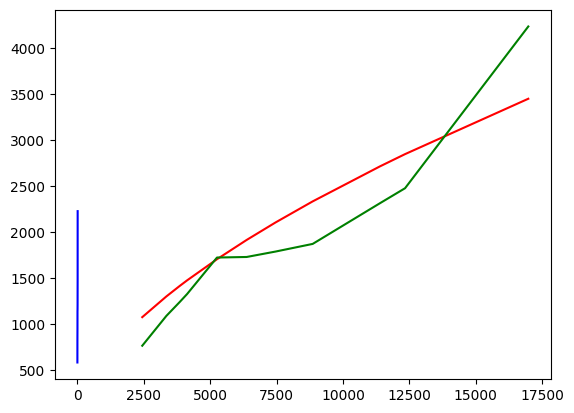

In [144]:
heaps = lambda N,k=10,b=.6 : k*(N**b)      # k=10~100, b=0.4~0.6
plt.plot([h.vocab().N() for h in heaps_1],
        [heaps(h.vocab().N()) for h in heaps_1], '-r')
plt.plot([h.vocab().N() for h in heaps_1],
        [h.vocab().B() for h in heaps_1], '-g')
plt.plot(range(1,len(data)+1),
        [h.vocab().B() for h in heaps_2], '-b')
# x축이 달라서 이렇게 그려짐

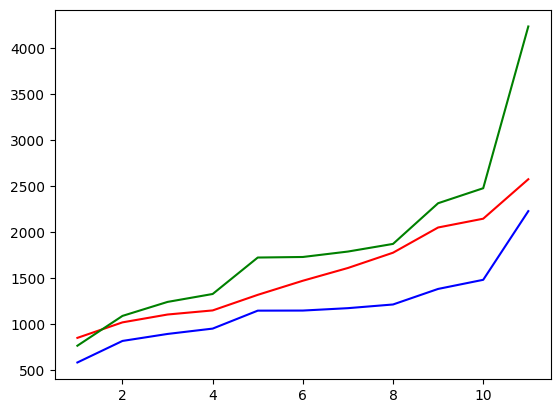

In [173]:
# x축 맞춰줌
heaps = lambda N,k=10,b=.57 : k*(N**b)      # k=10~100, b=0.4~0.6
plt.plot(range(1,len(data)+1),
        [heaps(h.vocab().N()) for h in heaps_1], '-r')  # 이게 유추한 선. 이 선 안에 유니크한 단어의 수가 들어옴
plt.plot(range(1,len(data)+1),
        [h.vocab().B() for h in heaps_1], '-g')
plt.plot(range(1,len(data)+1),
        [h.vocab().B() for h in heaps_2], '-b')

In [150]:
heaps(10000000)

51286.13839913651

In [ ]:
text -> Encoding(기계)
Zipf: 빈도의 순으로 나열했을 때, 빈도가 크다 = 확률 크다, P(크다)=중요, X
      텍스트(언어X)
Heap's: 문서 전체 단어수가, 문서가 많아질 수록 단어의 수도 많아짐
        단어의 수가 많아지니깐, 유니크 한 단어의 수도 많아짐
        어떤 법칙 전체 단어수^ =(법칙) 유니크 단어 ^
        5천개 -> 500개, 만개 -> 1000개

In [ ]:
# 정리
# 경험적 법칙 ; 지프의 법칙, 힙스의 법칙
# 이걸 하는 이유는
# 텍스트 -> 인코딩 ; 기계는 숫자 이외에 읽지 못하기 때문에
# 우리 말은 조사나 어미가 문제가 많이 됨. 형태소 분석기를 쓰면 조사나 어미를 자르는 경우가 대부분임.
# 그런 것들을 보느라 경험 법칙을 씀

# 지프의 법칙: 빈도의 순으로 나열 했을 떄, 일반적으로 빈도가 크다는 것은 확률이 크다는 것. 확률이 크다는 것은 중요하게 인식이 됨.
#         그러나 사람의 지식을 가지고 단어를 나열한 것을 보니 중요하지 않은 게 있더라는 것
#         그래서 텍스트는 어떤 언어든지 상관없이 이 법칙을 따름. 빈도의 역순으로 나열이 되기 때문에, 빈도가 높거나 순위가 높다고 해서
#         중요한 것이 아님을 보여줌

# 힙스의 법칙: 문서를 수집하면서, 문서에 들어있는 전체 단어수가 문서가 많아질 수록 단어의 수도 커질 것.
#           그렇게 되면 전체 등록된 단어의 수가 많아지니까 유니크한 단어의 수도 많아지겠구나 라고 생각 가능
#           그러나 실질적으로 어떤 법칙에 의해서 전체 단어의 수에 비례해서 유니크한 단어 수도 늘어남.
#           총 단어의 수가 10배가 늘어나면 유니크한 단어도 10배 늘어날 것 같지만 그렇지 않음. -> 로그 공간에서 비례하게 증가함
#           이를 이용하면 밸런스한 데이터셋인지, 유니크한 단어를 얼만큼 늘일까 줄일까를 알 수 있는 단서가 됨

# 두 법칙을 섞으면, 유니크한 단어가 5000개 일때, 지프의 법칙을 통해 앞뒤 잘라서 500개만 남김.
# 힙스의 법칙을 사용하여 유니크한 단어가 얼마나 늘어나게 될 지 예측 가능
# 텍스트 데이터를 측정할 수 있는 방법 중 하나가 바로 이 두가지 법칙을 사용하는 것.

#### N-Gram

In [ ]:
NLP: NLU:순서(문맥) 중요한
토큰1, 토큰2, 토큰3, ...
P(토큰1) = freq토근1/N => MLE
P(토큰2) = freq토근2/N
P(토큰2|토큰1) = P(토큰1,토큰2)/P(토큰1) = freq(토큰1,토큰2)/freq(토큰1)
P(토큰3|토큰1,토큰2) = ?
====================== LM
P(?|토큰1) => NLG
P('I love you') = P('I')*P('love|I')*P('you|I,love')
P('I like you') = P('I')*P('like|I')*P('you|I,like') = 0
                         freq('I,like') X?
P('')
N-gram:
    1-gram: I, love, like, you
    2-gram: (I,love), (I,like), (love,you), ...
    3-gram: (I,love,you), ...
            => 거의 없음
Markov Assumption:
    P(i|~i) ~= P(i|i-1) => 1st Markov Assumption
                P( | i-2 ) => 2nd "
'유구한 역사와 전통에 빛나는 우리'
P('우리'|'유구한') ~= P('우리'|'빛나는'?????)
          2-gram = (토큰1,토큰2), ... (?=11172,토큰2)
          3-gram = (토큰1, 토큰2, 토큰3), ... (?=11172,?=11172,토큰3)

In [ ]:
NLP 의 목적은 NLU. NLU가 되기 위해서는 문장을 구성하는 단어들의 순서, 문맥이 매우 중요한 요소임
이 중요한 요소를 놓칠 수 있음.
앞 분석은,
토큰1, 토큰2, 토큰3, ...
이를 NLU한다고 하면,
P(토큰1) = freq토큰1 / N => MLE 로 추정
P(토큰2) = freq토큰2 / N
얘네들은 개별 단어들임.
그런데 실질적으로 얘네들은 혼자 쓰이지 않음.
P(토큰2|토큰1) = P(토큰1, 토큰2)/P(토큰1) = freq(토큰1, 토큰2)/freq(토큰1)
=> 이게 조건부확률과 결합확률을 이용하는 것
P(토큰3|토큰1,토큰2) = ?
이렇게 NLU 진행
===================================== LM
P(?|토큰1) 를 유추할 수 있음.
앞에서 확률모델을 만들었으면 무엇인가 주어졌을 때 확률값에 따라 유추할 수 있음.
이게 NLG 인 것
그 때의 그 확률값을 LM이라고 부름

문제가 있음
P('I love you') = P('I')*P('love|I')*P('you|I,love')
그런데 브라운 코퍼스에 I love you 라는 표현이 6번 나오는 극소수임
P('I like you') = P('I')*P('like|I')*P('you|I,like')
                         freq('I,like') 이게 없으면? 그러면 P('I like you')가 0이 됨
    
이럴 때 joint 빈도수를 만들어야 함. 그 패턴이 필요함.
그 패턴을 찾아내는 방법 중 하나가 N-gram.
그리고 그 확률을 가지고 LM을 만드는 방법 중 하나가 N-gram

N-gram:
    1-gram(uni): I, love, like, you
    2-gram(bi): (I, love), (I, like), (love, you), ...
    3-gram: (I, love, you), ...
              => 3-gram(tri) 넘어가는 순간 거의 없음
            
그래서 사람들이 여기에 Markov Assumption 을 넣음. 제안하는 것.
Markov Assumption: 
    P(i|~i) 이것을 유사하게, P(i|i-1) 즉 내 앞에 있던 걸로 만들어진다고 제안. 이게 1차 마르코프 어섬션
                          P( | i-2)  이게 2차 Markov Assumption

In [175]:
'유구한 역사와 전통에 빛나는 우리'
P('우리'|'유구한') ~= P('우리'|'빛나는')
즉 한가지 케이스만 알면 됨.
한가지 케이스만 알수 있게 해주는 것이 바이그램; 2-gram = (토큰1, 토큰2), ...(?=11172,토큰2)

만약 마르코프 어섬션이 2차만 넘어가도 3-gram을 봐야 함
3-gram = (토큰1, 토큰2, 토큰3), ... (?=11172, ?=11172, 토큰3)   => 봐야하는 경우의 수가 더욱 늘어남

언어모델 관점

'유구한 역사와 전통에 빛나는 우리'

In [ ]:
'유구한 역사와 전통에 빛나는 우리'
bi-gram 가정할 때
방법1. '유구한', '유구한 역사와', '역사와 전통에', ..., '빛나는 우리', '우리'  => 패딩
방법2. '유구한 역사와', ... '빛나는 우리'

In [176]:
# nltk에 ngram 이 있음.
# 그런데 우리는 직접 만들어볼 것.
# 수식에 대한 이해를 위해서
# 2번째 방법(padding 없이)
def ngram(t, n=2):
    tokens = t.split()
    gram = list()
    
    if len(tokens) < n:
        return tokens
        
    for i in range(len(tokens)-(n-1)):   # 앞의 글자를 기준으로
        gram.append(' '.join(tokens[i:i+n]))
    return gram

In [177]:
ngram('유구한 역사와 전통에 빛나는 우리')

['유구한 역사와', '역사와 전통에', '전통에 빛나는', '빛나는 우리']

In [178]:
ngram('유구한 역사와 전통에 빛나는 우리', n=1)

['유구한', '역사와', '전통에', '빛나는', '우리']

In [179]:
ngram('유구한 역사와 전통에 빛나는 우리', n=3)

['유구한 역사와 전통에', '역사와 전통에 빛나는', '전통에 빛나는 우리']

In [180]:
# n-gram 을 가지고 data 실습
data[-1]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [181]:
ngram(data[-1])
# , 등 전처리를 하자

['대한민국헌법 유구한',
 '유구한 역사와',
 '역사와 전통에',
 '전통에 빛나는',
 '빛나는 우리',
 '우리 대한국민은',
 '대한국민은 3·1운동으로',
 '3·1운동으로 건립된',
 '건립된 대한민국임시정부의',
 '대한민국임시정부의 법통과',
 '법통과 불의에',
 '불의에 항거한',
 '항거한 4·19민주이념을',
 '4·19민주이념을 계승하고,',
 '계승하고, 조국의',
 '조국의 민주개혁과',
 '민주개혁과 평화적',
 '평화적 통일의',
 '통일의 사명에',
 '사명에 입각하여',
 '입각하여 정의·인도와',
 '정의·인도와 동포애로써',
 '동포애로써 민족의',
 '민족의 단결을',
 '단결을 공고히',
 '공고히 하고,',
 '하고, 모든',
 '모든 사회적',
 '사회적 폐습과',
 '폐습과 불의를',
 '불의를 타파하며,',
 '타파하며, 자율과',
 '자율과 조화를',
 '조화를 바탕으로',
 '바탕으로 자유민주적',
 '자유민주적 기본질서를',
 '기본질서를 더욱',
 '더욱 확고히',
 '확고히 하여',
 '하여 정치·경제·사회·문화의',
 '정치·경제·사회·문화의 모든',
 '모든 영역에',
 '영역에 있어서',
 '있어서 각인의',
 '각인의 기회를',
 '기회를 균등히',
 '균등히 하고,',
 '하고, 능력을',
 '능력을 최고도로',
 '최고도로 발휘하게',
 '발휘하게 하며,',
 '하며, 자유와',
 '자유와 권리에',
 '권리에 따르는',
 '따르는 책임과',
 '책임과 의무를',
 '의무를 완수하게',
 '완수하게 하여,',
 '하여, 안으로는',
 '안으로는 국민생활의',
 '국민생활의 균등한',
 '균등한 향상을',
 '향상을 기하고',
 '기하고 밖으로는',
 '밖으로는 항구적인',
 '항구적인 세계평화와',
 '세계평화와 인류공영에',
 '인류공영에 이바지함으로써',
 '이바지함으로써 우리들과',
 '우리들과 우리들의',
 '우리들의 자손의',
 '자손의 안전과',
 '안전과 자유와',
 '자유와 행

In [182]:
import re
from string import punctuation

In [183]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [184]:
re.escape(punctuation)

'!"\\#\\$%\\&\'\\(\\)\\*\\+,\\-\\./:;<=>\\?@\\[\\\\\\]\\^_`\\{\\|\\}\\~'

In [185]:
p1 = re.compile('[{}]'.format(re.escape(punctuation)))  # 구두점 다 사라짐
p2 = re.compile('\s+')  # 개행문자 등 화이트스페이스

In [186]:
p1.sub(' ', data[-1])

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고  조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고  모든 사회적 폐습과 불의를 타파하며  자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고  능력을 최고도로 발휘하게 하며  자유와 권리에 따르는 책임과 의무를 완수하게 하여  안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다 \n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다 \n②대한민국의 주권은 국민에게 있고  모든 권력은 국민으로부터 나온다 \n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다 \n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다 \n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다 \n  제4조 대한민국은 통일을 지향하며  자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다 \n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다 \n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며  그 정치적 중립성은 준수된다 \n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다 \n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다 \n  제7조 ① 공무원은 국민전체에 대한 봉사자이며  국민에 대하여 책임을 진다 \n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다 \n  제8조 ① 정

In [187]:
p2.sub(' ', data[-1])

'대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. 제1장 총강 제1조 ① 대한민국은 민주공화국이다. ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다. 제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다. ②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다. 제3조 대한민국의 영토는 한반도와 그 부속도서로 한다. 제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다. 제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다. ②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다. 제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다. ②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다. 제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다. ②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다. 제8조 ① 정당의 설립은 자유이며, 복수정당제는 보장된다. ②정당은 그 목적·조직과 활동

In [188]:
ngram(p2.sub(' ', p1.sub(' ', data[-1])))
# 콤마(,) 이런 게 사라져서 아까보다 좀 더 나아졌음

['대한민국헌법 유구한',
 '유구한 역사와',
 '역사와 전통에',
 '전통에 빛나는',
 '빛나는 우리',
 '우리 대한국민은',
 '대한국민은 3·1운동으로',
 '3·1운동으로 건립된',
 '건립된 대한민국임시정부의',
 '대한민국임시정부의 법통과',
 '법통과 불의에',
 '불의에 항거한',
 '항거한 4·19민주이념을',
 '4·19민주이념을 계승하고',
 '계승하고 조국의',
 '조국의 민주개혁과',
 '민주개혁과 평화적',
 '평화적 통일의',
 '통일의 사명에',
 '사명에 입각하여',
 '입각하여 정의·인도와',
 '정의·인도와 동포애로써',
 '동포애로써 민족의',
 '민족의 단결을',
 '단결을 공고히',
 '공고히 하고',
 '하고 모든',
 '모든 사회적',
 '사회적 폐습과',
 '폐습과 불의를',
 '불의를 타파하며',
 '타파하며 자율과',
 '자율과 조화를',
 '조화를 바탕으로',
 '바탕으로 자유민주적',
 '자유민주적 기본질서를',
 '기본질서를 더욱',
 '더욱 확고히',
 '확고히 하여',
 '하여 정치·경제·사회·문화의',
 '정치·경제·사회·문화의 모든',
 '모든 영역에',
 '영역에 있어서',
 '있어서 각인의',
 '각인의 기회를',
 '기회를 균등히',
 '균등히 하고',
 '하고 능력을',
 '능력을 최고도로',
 '최고도로 발휘하게',
 '발휘하게 하며',
 '하며 자유와',
 '자유와 권리에',
 '권리에 따르는',
 '따르는 책임과',
 '책임과 의무를',
 '의무를 완수하게',
 '완수하게 하여',
 '하여 안으로는',
 '안으로는 국민생활의',
 '국민생활의 균등한',
 '균등한 향상을',
 '향상을 기하고',
 '기하고 밖으로는',
 '밖으로는 항구적인',
 '항구적인 세계평화와',
 '세계평화와 인류공영에',
 '인류공영에 이바지함으로써',
 '이바지함으로써 우리들과',
 '우리들과 우리들의',
 '우리들의 자손의',
 '자손의 안전과',
 '안전과 자유와',
 '자유와 행복을',
 '행복을 영

In [189]:
len(ngram(p2.sub(' ', p1.sub(' ', data[-1]))))

4179

In [190]:
len(set(ngram(p2.sub(' ', p1.sub(' ', data[-1])))))

3342

In [191]:
# 확률값 만들기
# Text 객체쓰면 아주 간단함. 그런데 도움 받지 말자
model = dict()
for gram in ngram(p2.sub(' ', p1.sub(' ', data[-1]))):
    if gram in model:
        model[gram] += 1
    else:
        model[gram] = 1

In [194]:
model

{'대한민국헌법 유구한': 1,
 '유구한 역사와': 1,
 '역사와 전통에': 1,
 '전통에 빛나는': 1,
 '빛나는 우리': 1,
 '우리 대한국민은': 1,
 '대한국민은 3·1운동으로': 1,
 '3·1운동으로 건립된': 1,
 '건립된 대한민국임시정부의': 1,
 '대한민국임시정부의 법통과': 1,
 '법통과 불의에': 1,
 '불의에 항거한': 1,
 '항거한 4·19민주이념을': 1,
 '4·19민주이념을 계승하고': 1,
 '계승하고 조국의': 1,
 '조국의 민주개혁과': 1,
 '민주개혁과 평화적': 1,
 '평화적 통일의': 1,
 '통일의 사명에': 1,
 '사명에 입각하여': 1,
 '입각하여 정의·인도와': 1,
 '정의·인도와 동포애로써': 1,
 '동포애로써 민족의': 1,
 '민족의 단결을': 1,
 '단결을 공고히': 1,
 '공고히 하고': 1,
 '하고 모든': 1,
 '모든 사회적': 1,
 '사회적 폐습과': 1,
 '폐습과 불의를': 1,
 '불의를 타파하며': 1,
 '타파하며 자율과': 1,
 '자율과 조화를': 1,
 '조화를 바탕으로': 1,
 '바탕으로 자유민주적': 1,
 '자유민주적 기본질서를': 1,
 '기본질서를 더욱': 1,
 '더욱 확고히': 1,
 '확고히 하여': 1,
 '하여 정치·경제·사회·문화의': 1,
 '정치·경제·사회·문화의 모든': 1,
 '모든 영역에': 2,
 '영역에 있어서': 2,
 '있어서 각인의': 1,
 '각인의 기회를': 1,
 '기회를 균등히': 1,
 '균등히 하고': 1,
 '하고 능력을': 1,
 '능력을 최고도로': 1,
 '최고도로 발휘하게': 1,
 '발휘하게 하며': 1,
 '하며 자유와': 1,
 '자유와 권리에': 1,
 '권리에 따르는': 1,
 '따르는 책임과': 1,
 '책임과 의무를': 1,
 '의무를 완수하게': 1,
 '완수하게 하여': 1,
 '하여 안으로는': 1,
 '안으로는 국민생활의': 1,
 '국민생활의 균등한': 1,
 '균등

In [193]:
sum(model.values()), max(model.values())

(4179, 56)

In [207]:
sorted(model.items(), key=model.items()[1], reverse=True)[:10]

TypeError: 'dict_items' object is not subscriptable

In [198]:
sorted(model.items(), key=lambda _:_[1], reverse=True)[:10]

[('수 있다', 56),
 ('법률이 정하는', 48),
 ('정하는 바에', 37),
 ('바에 의하여', 36),
 ('법률로 정한다', 28),
 ('모든 국민은', 23),
 ('수 없다', 20),
 ('① 모든', 14),
 ('사항은 법률로', 14),
 ('의무를 진다', 11)]

In [199]:
list(filter(lambda t: t.endswith('있다'), list(model.keys())))

['수 있다', '의무가 있다']

In [201]:
list(filter(lambda t: t.startswith('수 '), list(model.keys())))

['수 있다', '수 있고', '수 없다', '수 없을', '수 있도록', '수 있으며', '수 있는']

In [200]:
list(filter(lambda t: t.startswith('의무가 '), list(model.keys())))

['의무가 있다']

In [202]:
totalfreq = 0

for k in list(filter(lambda t: t.startswith('수 '), list(model.keys()))):
    totalfreq += model[k]

In [203]:
totalfreq

87

In [204]:
for k in list(filter(lambda t: t.startswith('수 '), list(model.keys()))):
    print(k, str(model[k]/totalfreq))

수 있다 0.6436781609195402
수 있고 0.011494252873563218
수 없다 0.22988505747126436
수 없을 0.034482758620689655
수 있도록 0.022988505747126436
수 있으며 0.034482758620689655
수 있는 0.022988505747126436


In [ ]:
# 이게 likelihood 로 언어모델 만든 것
# 위에서는 "수 있다" 가 제일 좋은 선택

In [205]:
# 여기까지 아무런 형태소 분석 결과를 안썻음

In [ ]:
# 내일은 형태소 분석 결과를 가지고,
# 첫글자 주면 몇글자 문장단위로 생성하도록 만들 수 있을 것